In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Genai Project/augmented images/train/images/
%cd /content/drive/MyDrive/Genai Project/augmented images/test/images/
!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1euUzSZa1IjWGSY7kHFLr2B_d6lpqAzvE/Genai Project/augmented images/test/images
/content/drive/.shortcut-targets-by-id/1euUzSZa1IjWGSY7kHFLr2B_d6lpqAzvE/Genai Project/augmented images/test/images


In [ ]:
!ls

100_microF_electrolytic_capacitor-1-.rf.70428aedb26034a1cf240a00a413dc9b.jpg
830_Tie-Points_Breadboard-1-_jpg.rf.891297b1dc97698c1735f27e5ad25a03.jpg
DHT11_temperature_and_humidity_module-1-_jpg.rf.5c38285e7c2104feb855d825d7874efc.jpg
ELEGOO_Power_supply_module_jpg.rf.0f91a9d9887f8727ef8c89761fb0e9b7.jpg
ELEGOO_Remote_Control_jpg.rf.2de833b6f02008af5c517013ace30c03.jpg
Elegoo_UNO_R3_controller_board-2-_jpg.rf.c294a55dd33a42261eb601bea3c0f5eb.jpg
ESP_Wroom_32-1-_jpg.rf.4945098cb01f77d814e41b95a715be57.jpg
HiLetgo_GY-521_module_jpg.rf.f2e214072180ba14eb8c73a24baff02d.jpg
Servo_Motor_SG90_jpg.rf.f720d2bb1e573a03eee1b3a7a9a60fe6.jpg
Water_Level_Detection_Sensor_Module_jpg.rf.55a811f660d463223fe4c4d02d728718.jpg


In [ ]:
!pip install inference
!pip install inference-gpu
!pip install supervision

import cv2
from inference_sdk import InferenceHTTPClient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.5/345.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.7/308.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#calculate bounding box coordinate
def bounding_box_calc(predictions):
    x= predictions["x"]
    y= predictions["y"]
    width= predictions["width"]
    height= predictions["height"]

    x1 = int(x - (width/2))
    y1 = int(y - (height/2))
    x2 = int(x + (width/2))
    y2 = int(y + (height/2))

    box = (x1, x2, y1, y2)

    return box

In [ ]:
global_path = "/content/drive/MyDrive/Genai Project/augmented images/test/images/"
# image_path= "trained_model\\test\\images\\HiLetgo_GY-521_module_jpg.rf.f2e214072180ba14eb8c73a24baff02d.jpg"
# image_path = "HiLetgo_GY-521_module-1-_jpg.rf.9dc539490cefd68609dba81cc1e72f45.jpg"
image_path = global_path + "HiLetgo_GY-521_module_jpg.rf.f2e214072180ba14eb8c73a24baff02d.jpg"
# image_path = "train//images//Stepper_Motor_jpg.rf.891c07ede0464dbad68f15b1acbaee28.jpg"

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="sp4oI1Zf7i23t3HlL7eN"
)

results= CLIENT.infer(
    image_path,
    model_id="object-detection-using-vlm-llm/13"
)

In [ ]:
print(results)

{'time': 0.15434371800029112, 'image': {'width': 1024, 'height': 1024}, 'predictions': [{'x': 594.0, 'y': 720.0, 'width': 550.0, 'height': 348.0, 'confidence': 0.9825658798217773, 'class': 'hiletgo gy-521 module', 'class_id': 25, 'detection_id': '113bb13c-3ca1-46df-824a-4b5147c62b2c'}]}


In [ ]:
"""
Predictions are stored in a dictionary with keys as follows
{
x : , y : , width : , height : , confidence: , class : , class_id : , detection_id : ,
}
"""
predictions= results["predictions"][0]

print("predicted class : ", predictions["class"])

predicted class :  hiletgo gy-521 module


In [ ]:
#get bounding box coordinate
box_coordinates= bounding_box_calc(predictions)
print(box_coordinates)

(319, 869, 546, 894)


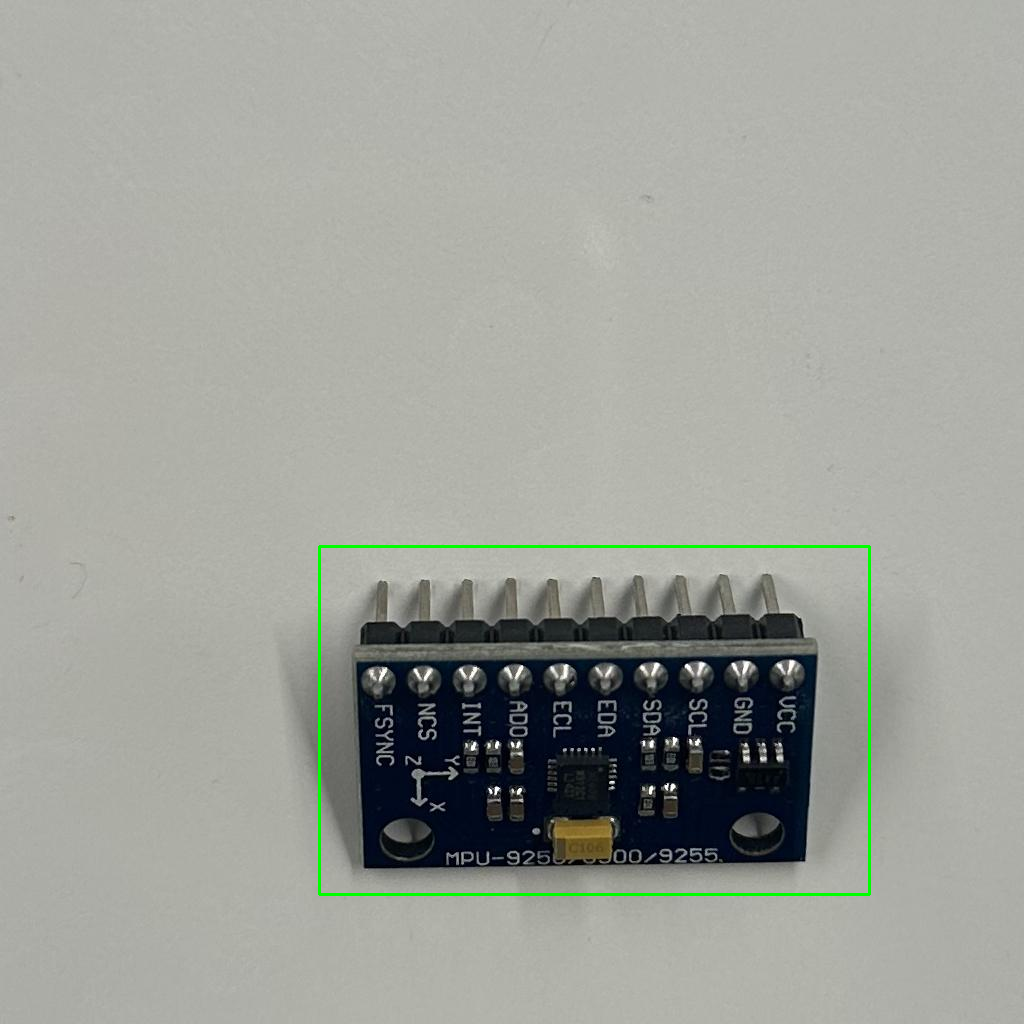

In [ ]:
from google.colab.patches import cv2_imshow
#draw bounding box
image= cv2.imread(image_path,cv2.IMREAD_COLOR)
color = (0, 255, 0)
thickness = 2
cv2.rectangle(image, (box_coordinates[0], box_coordinates[2]), (box_coordinates[1], box_coordinates[3]), color, thickness)
# cv2.imshow('Image with Bounding Box', image)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#draw bounding box
image= cv2.imread(image_path,cv2.IMREAD_COLOR)
# print(image)

In [ ]:
from transformers import pipeline
from PIL import Image
import requests

model_id = "llava-hf/llava-1.5-7b-hf"
pipe = pipeline("image-to-text", model=model_id)
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg"

image = Image.open(requests.get(url, stream=True).raw)
prompt = "USER: <image>\nWhat does the label 15 represent? (1) lava (2) core (3) tunnel (4) ash cloud\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs)

KeyboardInterrupt: 

In [ ]:
!pip install accelerate
#Have to restart session after installing this

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install accelerate
#Have to restart session after installing this

In [ ]:
# !pip install transformers
import torch
from transformers import pipeline, BitsAndBytesConfig

In [ ]:
quantization_config = BitsAndBytesConfig(load_in_8bit=True, bnb_4bit_compute_dtype=torch.float16)
model_id = "llava-hf/llava-1.5-7b-hf"
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/llava/configuration_llava.py:103: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [ ]:
from PIL import Image
import requests

# url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
# image_path = "/content/HiLetgo_GY-521_module-1-_jpg.rf.9dc539490cefd68609dba81cc1e72f45.jpg"
image_path = "/content/100_microF_electrolytic_capacitor-1-.rf.70428aedb26034a1cf240a00a413dc9b.jpg"
# raw_image = cv2.imread(image_path,cv2.IMREAD_COLOR)
image = Image.open(image_path)

# prompt = "USER: <image>\nWhat does the label 15 represent? (1) lava (2) core (3) tunnel (4) ash cloud\nASSISTANT:"
# prompt = "USER: <image>\nWhat is the object in the picture? What are its uses?\nASSISTANT:"
# prompt = "USER: <image>\n The object in the picture is an IOT kit. What is it called? What are its uses?\nASSISTANT:"
# prompt = """USER: <image>\nCan you make a short description about the object in the picture?

#           It should be divided into 3 sections as follows:
#           1) Description
#           2) Applications
#           3) technical specification\nASSISTANT:
#           """
prompt = """USER: <image>\n The object in the image is an IOT kit component called 100_microF_electrolytic_capacitor. Can you make a short description about the part:

          It should be divided into 3 sections as follows:
          1) Description
          2) Applications
          3) technical specification\nASSISTANT:
          """
# prompt = """USER: <image>\n The object in the image is an IOT kit component. Can you make a short description about the object?

#           It should be divided into 3 sections as follows:
#           1) Description
#           2) Applications
#           3) technical specification\nASSISTANT:
#           """
# prompt = "USER: <image>\n The object in the picture is HiLetgo_GY-521_module. What are its uses?\nASSISTANT:"
# prompt = "USER: <image>\n The object in the picture is an IOT kit component called HiLetgo_GY-521_module. What are its uses?\nASSISTANT:"


outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})
print(outputs)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[{'generated_text': 'USER:  \n The object in the image is an IOT kit component called 100_microF_electrolytic_capacitor. Can you make a short description about the part:\n\n          It should be divided into 3 sections as follows:\n          1) Description\n          2) Applications\n          3) technical specification\nASSISTANT:\n          1) Description: The 100_microF\\_electrolytic\\_capacitor is a small electronic component used in IoT kits. It is designed to store electrical energy in the form of an electric field within an electrolyte, which is typically a liquid or gel-like substance.\n\n          2) Applications: This capacitor can be used in various applications, such as powering sensors, controlling the timing of events, or providing a stable power supply to other components in an IoT system.\n\n          3) Technical Specification: The 100\\_microF\\_electrolytic\\_capacitor has a capacitance value of 100 microfarads, which means it can store 100 microfarads of electrica

In [ ]:
[{'generated_text': 'USER:  \n The object in the image is an IOT kit component called 100_microF_electrolytic_capacitor. Can you make a short description about the part:\n\n          It should be divided into 3 sections as follows:\n          1) Description\n          2) Applications\n          3) technical specification\nASSISTANT:\n          1) Description: The 100_microF\\_electrolytic\\_capacitor is a small electronic component used in IoT kits. It is designed to store electrical energy in the form of an electric field within an electrolyte, which is typically a liquid or gel-like substance.\n\n          2) Applications: This capacitor can be used in various applications, such as powering sensors, controlling the timing of events, or providing a stable power supply to other components in an IoT system.\n\n          3) Technical Specification: The 100\\_microF\\_electrolytic\\_capacitor has a capacitance value of 100 microfarads, which means it can store 100 microfarads of electrical charge. It is designed to operate over a wide range of temperatures, making it suitable for use in various environments. The component is small in size, making it easy to integrate into IoT kits and other electronic systems.'}]

In [ ]:
[{'generated_text': "USER:  \n The object in the image is an IOT kit component. Can you make a short description about the object?\n\n          It should be divided into 3 sections as follows:\n          1) Description\n          2) Applications\n          3) technical specification\nASSISTANT:\n          1) Description: The object in the image is a small electronic component, possibly a resistor or a capacitor, which is part of an IOT kit. It is black in color and is placed on a white surface.\n\n          2) Applications: This component is likely used in various electronic devices, such as smart home systems, wearable technology, and IoT devices. It can be used to control and monitor different aspects of a device, such as power consumption, signal processing, and data storage.\n\n          3) Technical Specification: The exact technical specifications of the component cannot be determined from the image alone. However, it is likely to have a specific resistance value or capacitance value, which can be determined through further examination or by referring to the manufacturer's documentation."}]

In [ ]:
[{'generated_text': 'USER:  \n The object in the image is an IOT kit component. Can you make a short description about the object?\n\n          It should be divided into 3 sections as follows:\n          1) Description\n          2) Applications\n          3) technical specification\nASSISTANT:\n          1) Description: The image features a small electronic component, possibly an IOT kit, sitting on a white surface. The component is blue and silver in color, and it appears to be a small electronic device.\n\n          2) Applications: This electronic component could be used in various applications, such as home automation, smart devices, or IoT systems. Its small size and versatile design make it suitable for integration into different devices and systems.\n\n          3) Technical Specification: The specifications of the electronic component are not provided in the image. However, it is likely to have features such as connectivity options, power supply, and compatibility with different devices and systems.'}]

In [ ]:
[{'generated_text': 'USER:  \n The object in the image is an IOT kit component called HiLetgo_GY-521_module. Can you make a short description about the part:\n\n          It should be divided into 3 sections as follows:\n          1) Description\n          2) Applications\n          3) technical specification\nASSISTANT:\n          1) Description: The HiLetgo\\_GY-521\\_module is an IOT kit component that is designed to work with microcontrollers. It is a small electronic device that can be used to control various electronic devices, such as motors, lights, and sensors.\n\n          2) Applications: The HiLetgo\\_GY-521\\_module can be used in a variety of applications, including home automation, robotics, and industrial control systems. It can be used to create smart devices that can be controlled remotely through a mobile app or a web interface.\n\n          3) Technical Specification: The HiLetgo\\_GY-521\\_module is a small electronic device that is designed to work with microcontrollers. It has a small form factor and can be easily integrated into a variety of electronic devices. It is compatible with a variety of microcontrollers, including Arduino and R'}]

In [ ]:
[{'generated_text': "USER:  \nCan you make a short description about the object in the picture?\n\n          It should be divided into 3 sections as follows:\n          1) Description\n          2) Applications\n          3) technical specification\nASSISTANT:\n          1) Description: The image features a small electronic device, possibly a microchip or a sensor, sitting on a white surface. The device is blue and silver in color, and it appears to be a small piece of electronic equipment.\n\n          2) Applications: The electronic device could be used in various applications, such as automation, robotics, or even in the development of smart home systems. Its precise function would depend on the specific type of device it is, but it is clear that it plays a crucial role in modern technology.\n\n          3) Technical Specification: The electronic device is a small blue and silver piece, likely measuring a few millimeters in size. It is sitting on a white surface, which provides a clean and uncluttered backdrop for the image. The device's specifications would depend on its type, but it is evident that it is a crucial component in the world of electronics."}]

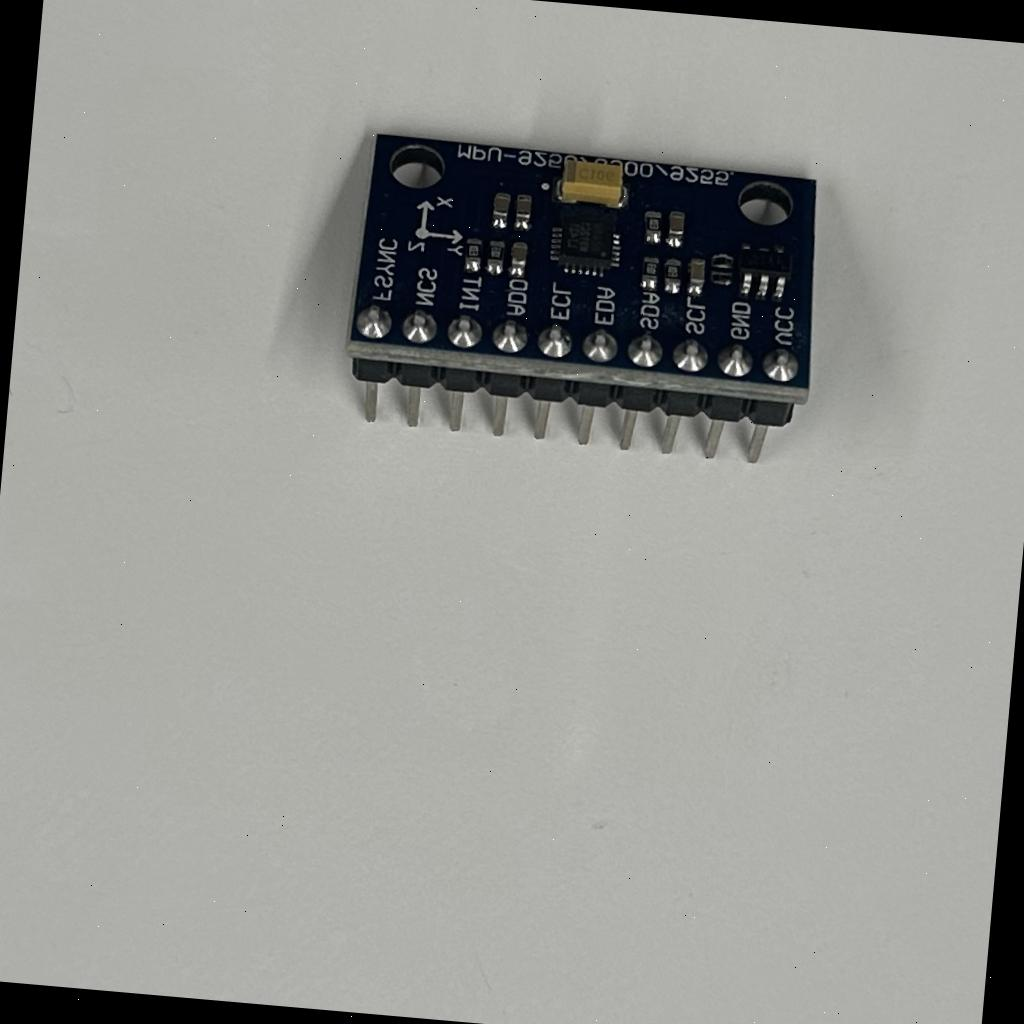

In [ ]:
# [{'generated_text': 'USER:  \n The object in the picture is an IOT kit component called HiLetgo_GY-521_module. What are its uses?\nASSISTANT: The HiLetgo GY-521 module is an IOT kit component that can be used for various purposes, such as controlling and monitoring electronic devices, creating smart home systems, and enhancing the functionality of existing devices. It is a versatile device that can be integrated into different projects, including temperature and humidity sensors, motion detectors, and even as a remote control for various devices. The GY-521 module can be easily programmed using a variety of programming languages, making it a popular choice for DIY enthusiasts and professionals alike.'}]
raw_image